In [1]:
from IPython.core.display import HTML
with open('../style.css') as file:
    css = file.read()
HTML(css)

# Ordered Binary Trees

This notebook implements *ordered binary trees*.  In order to define this notion, we first have to define 
the concept of *ordered binary trees*.  In the following, assume a set $\texttt{Key}$ and a set $\texttt{Value}$ are given.   Then, the
set $\mathcal{B}$ of all *ordered binary trees* is defined inductively.
  - $\texttt{Nil} \in \mathcal{B}$
  - $\texttt{Node}(k, v, l, r) \in \mathcal{B}$  iff the following conditions hold:
      - $k \in\texttt{Key}$,
      - $v \in\texttt{Value}$,
      - $l \in\mathcal{B}$,
      - $r \in\mathcal{B}$,
      - all keys that occur in the left subtree $l$ are smaller than $k$,
      - all keys that occur in the right subtree $r$ are bigger than $k$,
      
        therefore $l < k < r$.

The class `OrderedBinaryTree` represents the nodes of an ordered binary tree.
  - $\texttt{Nil}$           is created as $\texttt{OrderedBinaryTree}()$.
  - $\texttt{Node}(k,v,l,r)$ is created as follows:
    ```
    t = OrderedBinaryTree()
    t.mKey   = k
    t.mValue = v
    t.mLeft  = l
    t.mRight = r
    ```
The constructor below creates the empty tree.

In [2]:
class OrderedBinaryTree:
    def __init__(self):
        self.mKey   = None
        self.mValue = None
        self.mLeft  = None
        self.mRight = None

Given an ordered binary tree $t$, the expression $t.\texttt{isEmpty}()$ checks whether $t$ is the empty tree.

In [3]:
def isEmpty(self):
    return self.mKey == None

OrderedBinaryTree.isEmpty = isEmpty
del isEmpty

Given an ordered binary tree $t$ and a key $k$, the expression $t.\texttt{find}(k)$ returns the value stored unter the key $k$.
The method `find` is defined inductively as follows:
  - $\texttt{Nil}.\texttt{find}(k) = \Omega$,

    because the empty tree is interpreted as the empty map.
  - $\texttt{Node}(k, v, l, r).\texttt{find}(k) = v$,
      
    because the node $\texttt{Node}(k,v,l,r)$ stores the assignment $k \mapsto v$.
  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2, v, l, r).\texttt{find}(k_1) = l.\texttt{find}(k_1)$,

    because if $k_1$ is less than $k_2$, then any mapping for $k_1$ has to be stored in the left subtree  $l$.
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2, v, l, r).\texttt{find}(k_1) = r.\texttt{find}(k_1)$,

    because if $k_1$ is greater than $k_2$, then any mapping for $k_1$ has to be stored in the right subtree  $r$.

In [4]:
def find(self, key):
    if self.isEmpty():
        return None
    elif self.mKey == key:
        return self.mValue
    elif key < self.mKey:
        return self.mLeft.find(key)
    else:
        return self.mRight.find(key)
    
OrderedBinaryTree.find = find
del find

Given an ordered binary tree $t$, a key $k$ and a value $v$, the expression $t.\texttt{insert}(k, v)$ updates the tree $t$ such that the key $k$ is associated with the value $v$.
The method `insert` is defined inductively as follows:
  - $\texttt{Nil}.\texttt{insert}(k,v) = \texttt{Node}(k,v, \texttt{Nil}, \texttt{Nil})$,
  
    If the tree is empty, the information to be stored is stored at the root.
  - $\texttt{Node}(k,v_2,l,r).\texttt{insert}(k,v_1) = \texttt{Node}(k, v_1, l, r)$,

    If the key $k$ is located at the root, we overwrite the old information. 
  - $k_1 < k_2 \rightarrow 
    \texttt{Node}(k_2, v_2, l, r).\texttt{insert}(k_1, v_1) = \texttt{Node}\bigl(k_2, v_2, l.\texttt{insert}(k_1, v_1), r\bigr)$,

    If the key $k_1$, which is the key for which we want to store a value, is less than the key
    $k_2$ at the root, then we have to insert the information in the left subtree.
  - $k_1 > k_2 \rightarrow 
         \texttt{Node}(k_2, v_2, l, r).\texttt{insert}(k_1, v_1) = 
         \texttt{Node}\bigl(k_2, v_2, l, r.\texttt{insert}(k_1, v_1)\bigr)$,

    If the key $k_1$, which is the key for which we want to store a value, is bigger than the key
    $k_2$ at the root, then we have to insert the information in the right subtree.

In [5]:
def insert(self, key, value):
    if self.isEmpty():
        self.mKey   = key
        self.mValue = value
        self.mLeft  = OrderedBinaryTree()
        self.mRight = OrderedBinaryTree()
    elif self.mKey == key:
        self.mValue = value
    elif key < self.mKey:
        self.mLeft.insert(key, value)
    else:
        self.mRight.insert(key, value)

OrderedBinaryTree.insert = insert
del insert

Given an ordered binary tree $t$ and a key $k$, the expression $t.\texttt{delete}(k)$ removes the key $k$ and its associated value from $t$.  The method `delete` is defined inductively.
  - $\texttt{Nil}.\texttt{delete}(k) = \texttt{Nil}$.
  - $\texttt{Node}(k,v,\texttt{Nil},r).\texttt{delete}\bigl(k\bigr) = r$.
  - $\texttt{Node}(k,v,l,\texttt{Nil}).\texttt{delete}(k) = l$.
  - If $l \not= \texttt{Nil} \,\wedge\, r \not= \texttt{Nil} \,\wedge\, r.\texttt{delMin}() = [r',k_{min}, v_{min}]$,
    then
    
    $$\texttt{Node}(k,v,l,r).\texttt{delete}(k) = \texttt{Node}(k_{min},v_{min},l,r').$$
      
    If the key to be removed is found at the root of the tree and neither of its subtrees is
    empty, the call  $r\mathtt{.}\texttt{delMin}()$ removes the smallest key together with its
    associated value from the subtree $r$ yielding the subtree $r'$.
    The smallest key from $r$ is then stored at the root of the new tree.

  - $k_1 < k_2 \rightarrow \texttt{Node}(k_2,v_2,l,r).\texttt{delete}\bigl(k_1) = 
    \texttt{Node}(k_2,v_2,l.\texttt{delete}(k_1),r)$.

    If the key that is to be removed is less than the key stored at the root, the key $k$ can only be
    located in the left subtree $l$.  Hence, $k$ is removed from the left subtree $l$ recursively.
  - $k_1 > k_2 \rightarrow \texttt{Node}(k_2,v_2,l,r).\texttt{delete}(k_1) = 
    \texttt{Node}(k_2,v_2,l,r.\texttt{delete}(k_1))$.

    If the key that is to be removed is greater than the key stored at the root, the key $k$ can only be
    located in the right subtree $r$.  Hence, $k$ is removed from the right subtree $r$ recursively.

In [6]:
def delete(self, key):
    if self.isEmpty():
        return
    if key == self.mKey:
        if self.mLeft.isEmpty():
            self._update(self.mRight) # the following would not work: self = self.mRight
        elif self.mRight.isEmpty():
            self._update(self.mLeft)
        else:
            rs, km, vm = self.mRight._delMin()
            self.mKey   = km
            self.mValue = vm
            self.mRight = rs
    elif key < self.mKey:
        self.mLeft.delete(key)
    else:
        self.mRight.delete(key)
        
OrderedBinaryTree.delete = delete
del delete

Given a non-empty ordered binary tree $t$, the expression $t.\texttt{delMin}()$ removes the smallest key $k_m$ and its associated value $v_m$ from $t$ and returns the triple
$$(r,k_m,v_m),$$
where $r$ is the tree that  results from removing $k_m$ and $v_m$ from $t$.  The function is defined via the following equations:
  - $\texttt{Node}(k, v, \texttt{Nil}, r).\texttt{delMin}() = (r, k, v)$

    If the left subtree is empty, $k$ has to be the smallest key in the tree 
    $\texttt{Node}(k, v, \texttt{Nil}, r)$.  If $k$ is removed, we are left with the subtree $r$.
  - $l\not= \texttt{Nil} \wedge l.\texttt{delMin}() = (l',k_{min}, v_{min}) \;\rightarrow
      \texttt{Node}(k, v, l, r).\texttt{delMin}() = \bigl(\texttt{Node}(k, v, l', r), k_{min}, v_{min}\bigr)$.

    If the left subtree $l$ in the binary tree $t = \texttt{Node}(k, v, l, r)$
    is not empty, then the smallest key of  $t$ is located inside the left subtree $l$.
    This smallest key is recursively removed from  $l$. This yields the tree 
    $l'$.  Next,  $l$ is replaced by $l'$ in $t$.  The resulting tree is
    $t' = \texttt{Node}(k, v, l', r)$.

In [7]:
def _delMin(self):
    if self.mLeft.isEmpty():
        return self.mRight, self.mKey, self.mValue
    else:
        ls, km, vm = self.mLeft._delMin()
        self.mLeft = ls
        return self, km, vm
    
OrderedBinaryTree._delMin = _delMin
del _delMin

Given two ordered binary trees `s` and `t`, the expression `s._update(t)` overwrites the attributes of `s` with the corresponding attributes of `t`.

In [8]:
def _update(self, t):
    self.mKey   = t.mKey
    self.mValue = t.mValue
    self.mLeft  = t.mLeft
    self.mRight = t.mRight
    
OrderedBinaryTree._update = _update
del _update

Given an ordered binary tree $b$, the method $b.\texttt{keyList}()$ returns the list of all keys occurring in $b$.
Note that this list has to be sorted ascendingly.

In [9]:
def keyList(self):
    if self.isEmpty():
        return []
    return self.mLeft.keyList() + [self.mKey] + self.mRight.keyList()

OrderedBinaryTree.keyList = keyList
del keyList

In [10]:
import graphviz as gv

Given an ordered binary tree $t$, the function $t.\texttt{toDot}()$ renders the tree graphically using `graphviz`.

In [11]:
def toDot(self):
    OrderedBinaryTree.sNodeCount = 0 # static variable of class OrderedBinaryTree
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n, t in NodeDict.items():
        if t.mValue != None:
            dot.node(str(n), label='{' + str(t.mKey) + '|' + str(t.mValue) + '}')
        elif t.mKey != None:
            dot.node(str(n), label=str(t.mKey))
        else:
            dot.node(str(n), label='', shape='point')
    for n, t in NodeDict.items():
        if not t.mLeft == None:
            dot.edge(str(n), str(t.mLeft.mID))
        if not t.mRight == None:
            dot.edge(str(n), str(t.mRight.mID))
    return dot

OrderedBinaryTree.toDot = toDot
del toDot

Given a binary tree `t` the method `t._assignIDs(NodeDict)` assigns a unique identifier with each node.  The dictionary `NodeDict` maps these identifiers to the nodes where they occur.

In [12]:
def _assignIDs(self, NodeDict):
    OrderedBinaryTree.sNodeCount += 1
    self.mID = OrderedBinaryTree.sNodeCount
    NodeDict[self.mID] = self
    if self.isEmpty():
        return
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
OrderedBinaryTree._assignIDs = _assignIDs
del _assignIDs

The function $\texttt{demo}()$ creates a small ordered binary tree.

In [13]:
def demo():
    m = OrderedBinaryTree()
    m.insert("anton",  123)
    m.insert("hugo" ,  345)
    m.insert("gustav", 789)
    m.insert("mariam", 345)
    m.insert("jens",   234)
    m.insert("hubert", 432)
    m.insert("andre",  342)
    m.insert("philipp", 342)
    m.insert("rene",   345)
    m.insert("ans", 123)
    m.insert("alfa", 123)
    m.insert("algo", 345)
    return m

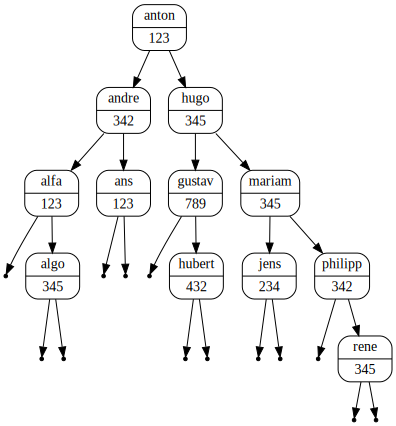

In [14]:
t = demo()
t.toDot()

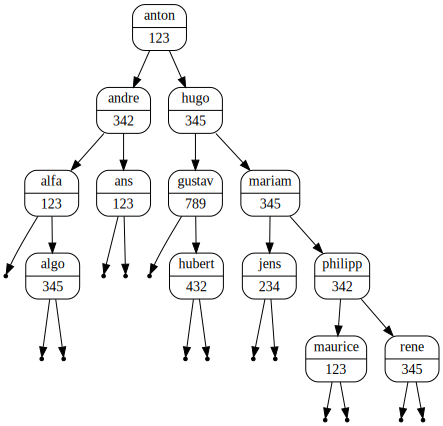

In [16]:
t.insert('maurice', 123)
t.toDot()

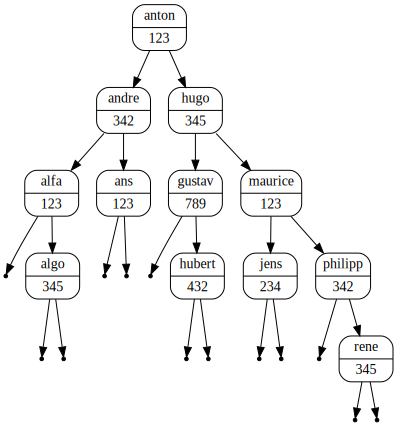

In [17]:
t.delete('mariam')
t.toDot()

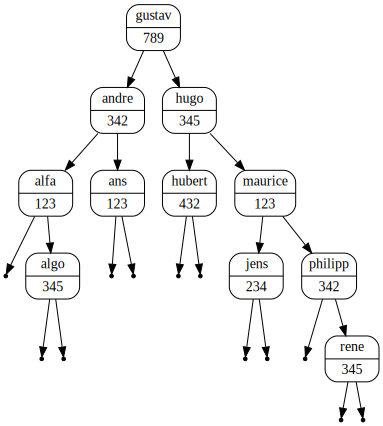

In [18]:
t.delete('anton')
t.toDot()

In [ ]:
t.delete('gustav')
t.toDot()

In [ ]:
t.delete('hubert')
t.toDot()

Let's generate an ordered binary tree with random keys.

In [19]:
import random as rnd

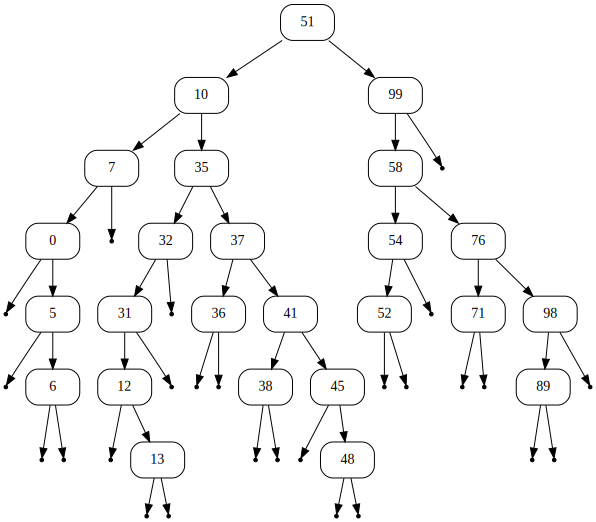

In [20]:
t = OrderedBinaryTree()
for k in range(30):
    k = rnd.randrange(100)
    t.insert(k, None)
t.toDot()

This tree looks more or less balanced.  Lets us create a tree where things do not work out that well.

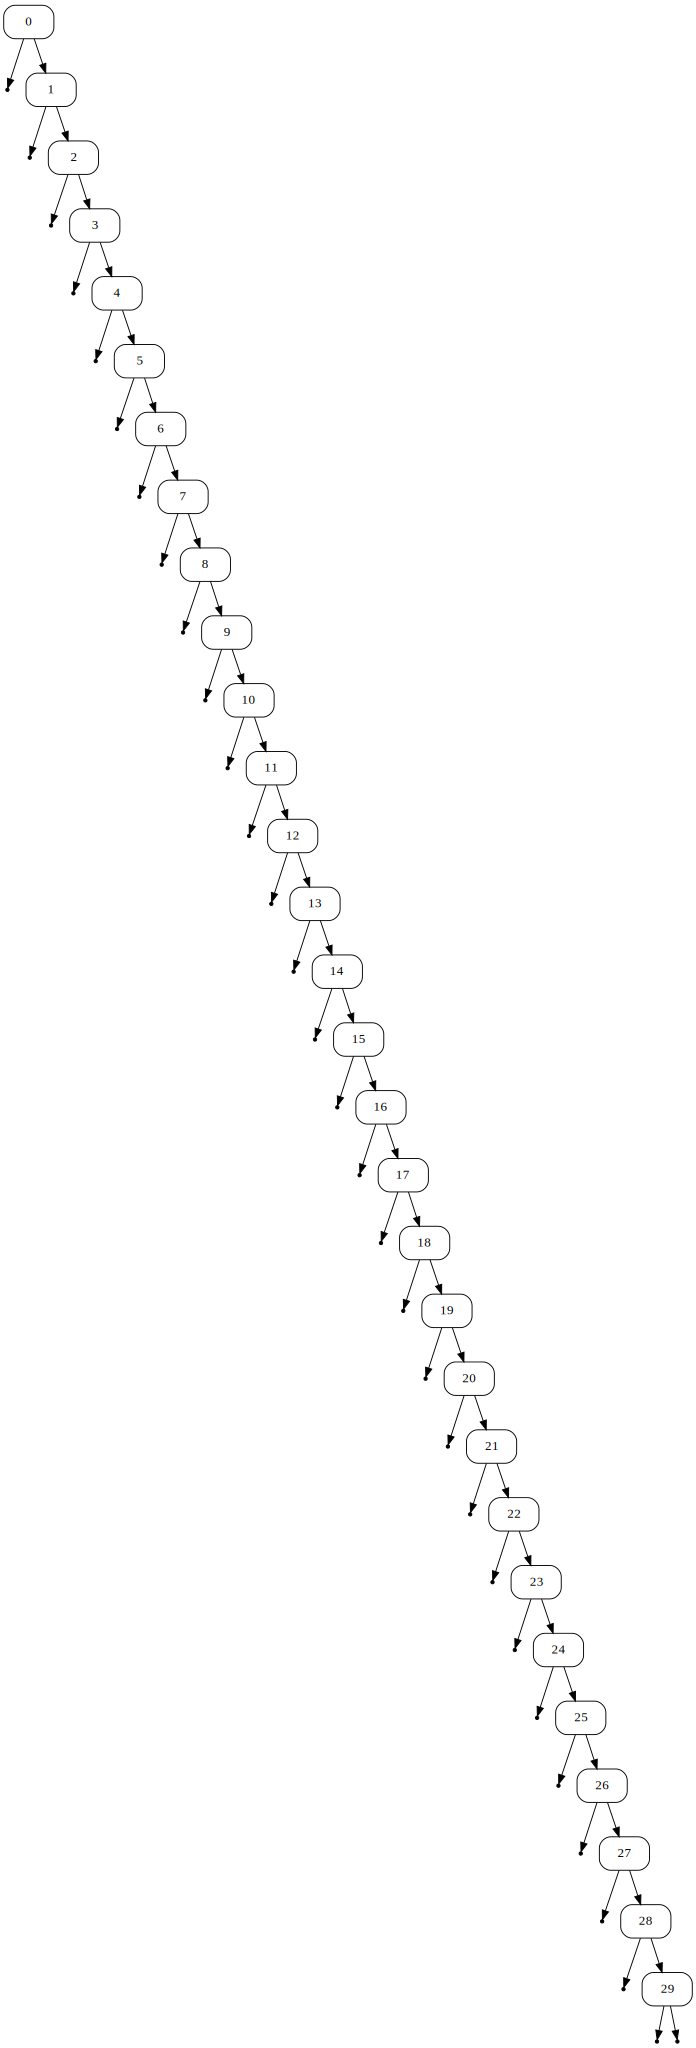

In [21]:
t = OrderedBinaryTree()
for k in range(30):
    t.insert(k, None)
t.toDot()

In order to check whether the method `delete` works as expected, we try the following:

In [22]:
for k in range(30):
    t.delete(k)
t.toDot()

Let us compute the set $S$ of prime numbers up to some given number $n\in\mathbb{N}$.  Mathematically, this set can be defined as
$$ S = \{ 2, \cdots, n \} - \bigl\{ p \cdot q \;\big|\; p, q \in \{2, \cdots, n \} \bigr\}. $$

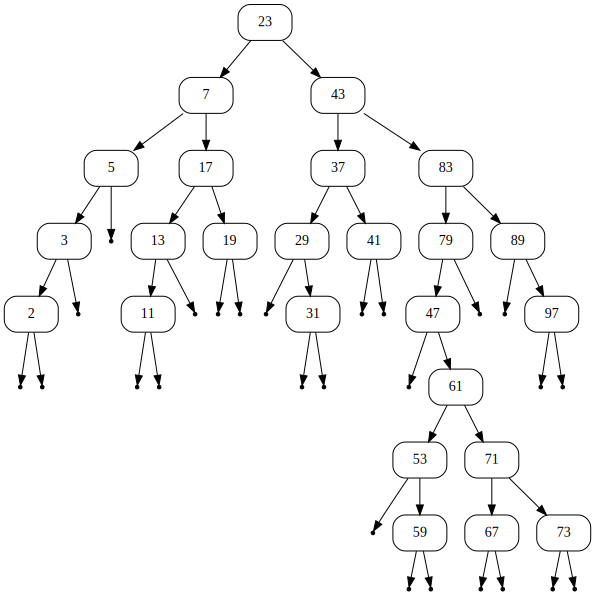

In [23]:
n = 100
S = OrderedBinaryTree()
L = list(range(2, n + 1))
rnd.shuffle(L)  # avoid worst case performance
for x in L:
    S.insert(x, None)
for p in range(2, n // 2 + 1):
    for q in range(p, n // p + 1):
        S.delete(p * q)
S.toDot()

In [24]:
print(S.keyList())

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
